## Identificação do Aluno/Dupla:

**Nome/Matrícula:** Renan Vieira Guedes/221031363

**Nome/Matrícula:** Gabriel Costa de Oliveira/190045817 


---


## Primeiro Projeto de Tópicos Especiais em Matemática Aplicada (01/2024)

**Contexto do Conjunto de Dados**

Embora muitos estudos tenham sido realizados no passado sobre fatores que afetam a expectativa de vida, considerando variáveis demográficas, composição de renda e taxas de mortalidade, foi descoberto que o efeito da imunização e do índice de desenvolvimento humano não foi levado em consideração. Além disso, algumas das pesquisas anteriores foram feitas considerando a regressão linear múltipla com base em um conjunto de dados de um ano para todos os países. Portanto, isso dá motivação para resolver ambos os fatores declarados anteriormente, formulando um modelo de regressão ainda com base na regressão linear múltipla, considerando dados de um período de 2000 a 2015 para todos os países. Imunizações importantes como hepatite B, poliomielite e difteria também serão consideradas. Em poucas palavras, este estudo se concentrará em fatores de imunização, fatores de mortalidade, fatores econômicos, fatores sociais e outros fatores relacionados à saúde também. Como as observações deste conjunto de dados são baseadas em diferentes países, será mais fácil para um país determinar o fator de previsão que está contribuindo para um menor valor da expectativa de vida. Isso ajudará a sugerir a um país qual área deve receber importância para melhorar eficientemente a expectativa de vida de sua população.

**Conteúdo**

O projeto depende da precisão dos dados. O repositório de dados do Observatório Global da Saúde (GHO) da Organização Mundial da Saúde (OMS) monitora o estado de saúde, bem como muitos outros fatores relacionados para todos os países. Os conjuntos de dados são disponibilizados ao público para fins de análise de dados de saúde. O conjunto de dados relacionado à expectativa de vida, fatores de saúde para 193 países foi coletado do mesmo site do repositório de dados da OMS e seus dados econômicos correspondentes foram coletados do site das Nações Unidas. Entre todas as categorias de fatores relacionados à saúde, apenas os fatores críticos foram escolhidos, os quais são mais representativos. Foi observado que nos últimos 15 anos, houve um enorme desenvolvimento no setor da saúde, resultando na melhoria das taxas de mortalidade humana, especialmente nas nações em desenvolvimento, em comparação aos últimos 30 anos. Portanto, neste projeto, consideramos dados do ano 2000-2015 para 193 países para análise posterior. Os arquivos de dados individuais foram mesclados em um único conjunto de dados. Na inspeção visual inicial, os dados mostraram alguns valores ausentes. Como os conjuntos de dados eram da OMS, não encontramos erros evidentes. Os dados ausentes foram manipulados no software R usando o comando Missmap. O resultado indicou que a maioria dos dados ausentes era para população, hepatite B e PIB. Os dados ausentes eram de países menos conhecidos, como Vanuatu, Tonga, Togo, Cabo Verde etc. Encontrar todos os dados para esses países foi difícil e, portanto, foi decidido que excluíssemos esses países do conjunto de dados do modelo final. O arquivo mesclado final (conjunto de dados final) consiste em 22 colunas e 2938 linhas, o que significava 20 variáveis de previsão. Todas as variáveis de previsão foram então divididas em várias categorias amplas: Fatores relacionados à imunização, Fatores de mortalidade, Fatores econômicos e Fatores sociais.

**O conjunto de dados visa responder às seguintes perguntas-chave:**

* Os vários fatores de previsão que foram escolhidos inicialmente realmente afetam a expectativa de vida?
* Quais são as variáveis de previsão que realmente afetam a expectativa de vida?
* Um país com um valor de expectativa de vida menor (menor que 65 anos) deve aumentar seus gastos com saúde para melhorar sua expectativa de vida média?
* Como as taxas de mortalidade infantil e adulta afetam a expectativa de vida?
* A expectativa de vida tem correlação positiva ou negativa com hábitos alimentares, estilo de vida, exercícios, fumo, consumo de álcool etc.
* Qual é o impacto da escolaridade na expectativa de vida dos humanos?
* A expectativa de vida tem relação positiva ou negativa com o consumo de álcool?
* Os países densamente povoados tendem a ter menor expectativa de vida?
* Qual é o impacto da cobertura de imunização na expectativa de vida?

*Obs.: este conjunto de dados pode ser encontrado no [Kaggle](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)*

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

Importamos o nosso dataset e fazemos um tratamento de valores NULL na tabela usando o método dropna()

In [61]:
data = pd.read_csv('life_expectancy_data.csv')
data = data.dropna()

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Life expectancy '}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>],
       [<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Measles '}>],
       [<Axes: title={'center': ' BMI '}>,
        <Axes: title={'center': 'under-five deaths '}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>],
       [<Axes: title={'center': 'Diphtheria '}>,
        <Axes: title={'center': ' HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': ' thinness  1-19 years'}>,
        <Axes: title={'center': ' thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>,
        <Axes: title={'center

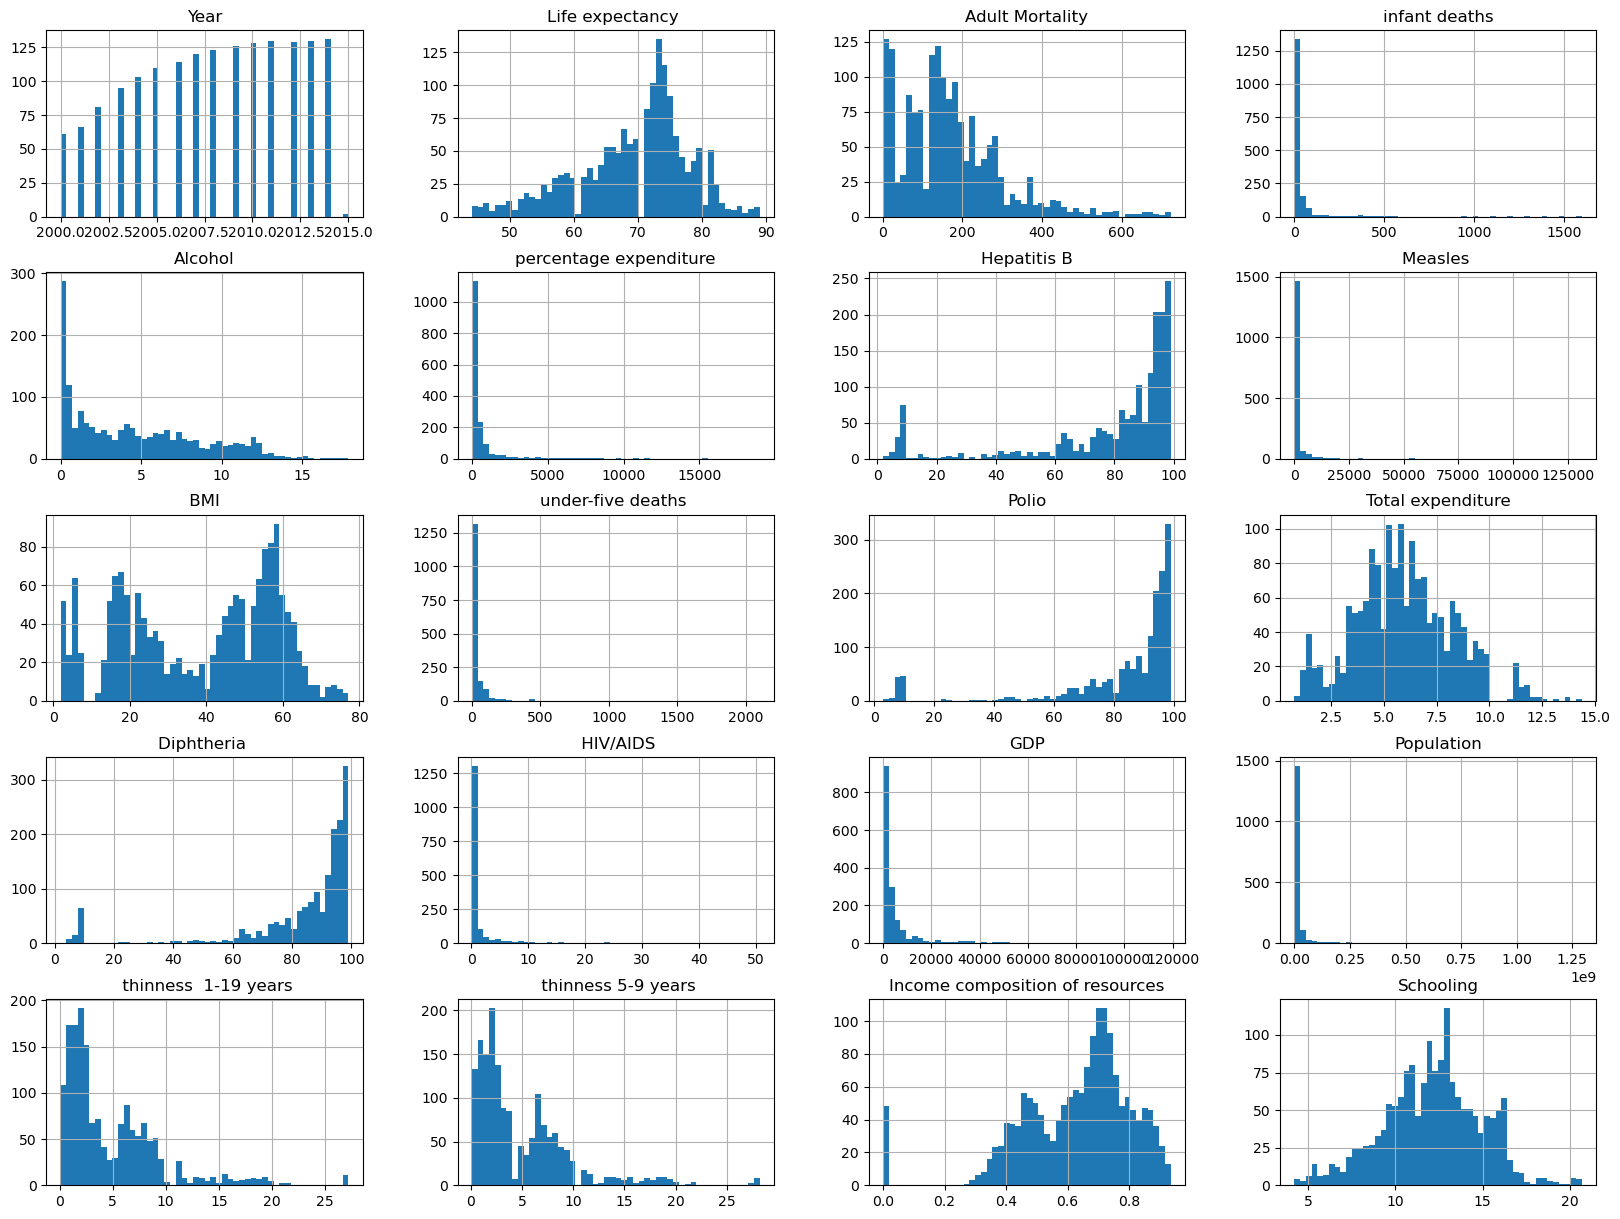

In [62]:
data.hist(bins=50, figsize=(20,15))

Abaixo conferimos algumas informações gerais sobre o dataset como por exemplo:
- uma amostra inicial dos dados contidos na tabela
- quais são as colunas e a quantidade de valores não nulos que temos em cada uma
- por fim, o cálculo de várias estatísticas descritivas que resumem a tendência central, dispersão e forma da distribuição do nosso conjunto de dados

In [63]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio                    

|Field|Description|
|---:|:---|
|Country|Country|
|Year|Year|
|Status|Developed or Developing status|
|Life expectancy|Life Expectancy in age|
|Adult Mortality|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)|
|infant deaths|Number of Infant Deaths per 1000 population|
|Alcohol|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)|
|percentage expenditure|Expenditure on health as a percene of Gross Domestic Product per capita(%)|
|Hepatitis B|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)|
|Measles|Measles - number of reported cases per 1000 population|
|BMI|Average Body Mass Index of entire population|
|under-five deaths|Number of under-five deaths per 1000 population|
|Polio|Polio (Pol3) immunization coverage among 1-year-olds (%)|
|Total expenditure|General government expenditure on health as a percene of total government expenditure (%)|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)|
|HIV/AIDS|Deaths per 1 000 live births HIV/AIDS (0-4 years)|
|GDP|Gross Domestic Product per capita (in USD)|
|Population|Population of the country|
|thinness 1-19 years|Prevalence of thinness among children and adolescents for Age 10 to 19 (%)|
|thinness 5-9 years|Prevalence of thinness among children for Age 5 to 9(%)|
|Income composition of resources|Income composition of resources|
|Schooling|Number of years of Schooling(years)|


In [65]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


#### 1. Os vários fatores de previsão que foram escolhidos inicialmente realmente afetam a expectativa de vida?

Para responder essa perguntar iremos plotar os gráficos dos dados inicialmente escolhidos pela expectativa de vida.

Segundo o texto, os dados escolhidos inicialmente são: variáveis demográficas, composição de renda e taxas de mortalidade

No nosso dataset, temos os seguintes colunas que correspondem a esses dados:
- variáveis demográficas -> Population, thinness 1-19 years, thinness 5-9 years
- composição de renda -> Income composition of resources
- taxas de mortalidade -> Adult Mortality, infant deaths, under-five deaths

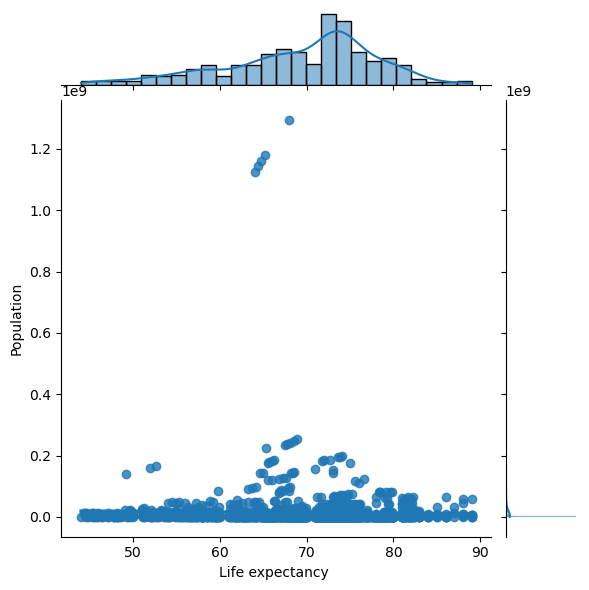

In [66]:
sns.jointplot(x='Life expectancy ', y='Population', data=data, kind='reg')

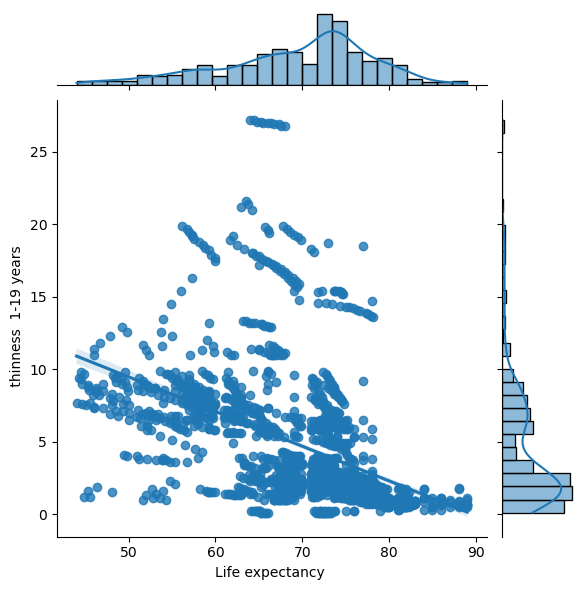

In [67]:
sns.jointplot(x='Life expectancy ', y=' thinness  1-19 years', data=data, kind='reg')

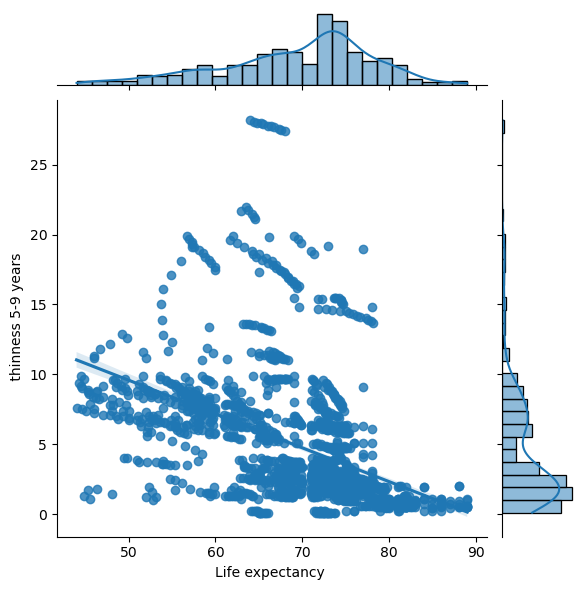

In [68]:
sns.jointplot(x='Life expectancy ', y=' thinness 5-9 years', data=data, kind='reg')

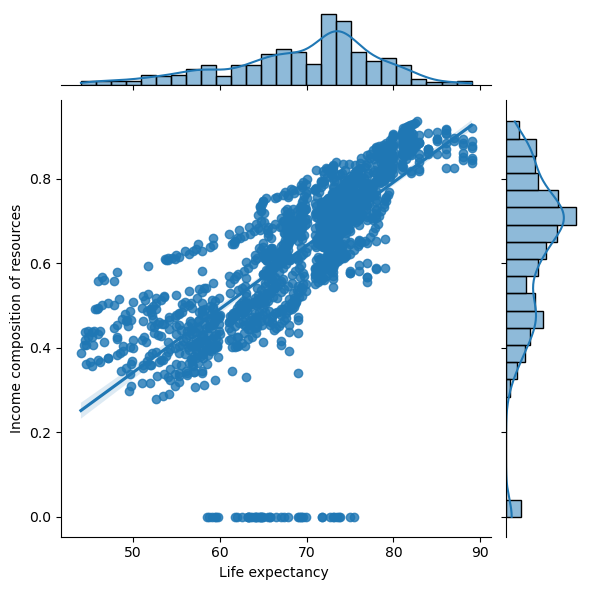

In [69]:
sns.jointplot(x='Life expectancy ', y='Income composition of resources', data=data, kind='reg')

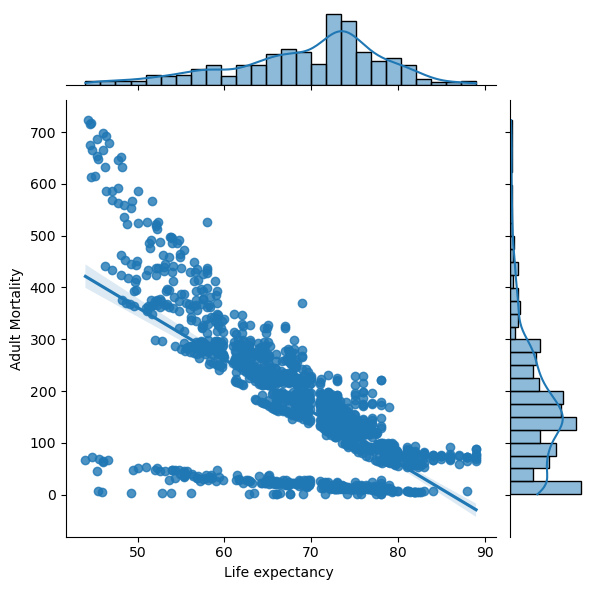

In [70]:
sns.jointplot(x='Life expectancy ', y='Adult Mortality', data=data, kind='reg')

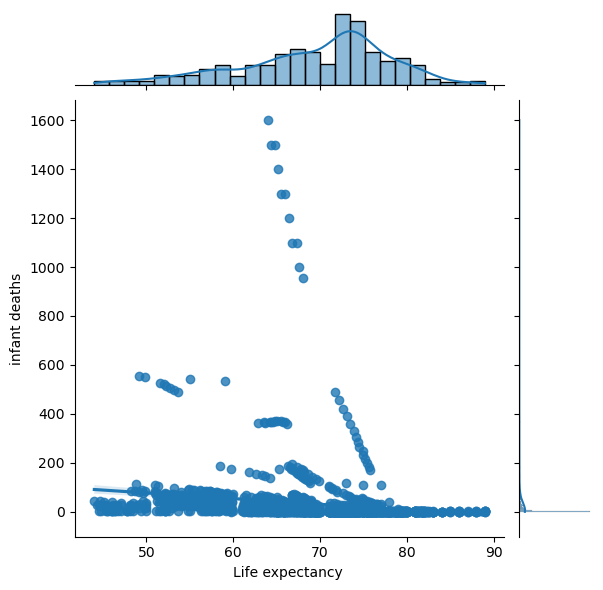

In [71]:
sns.jointplot(x='Life expectancy ', y='infant deaths', data=data, kind='reg')

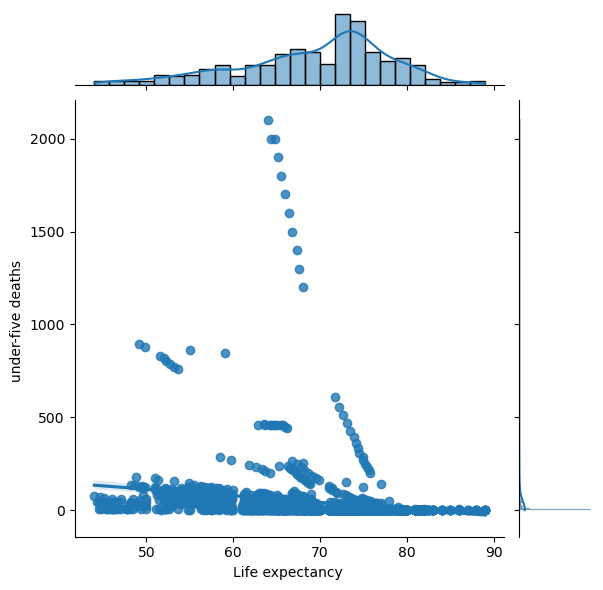

In [72]:
sns.jointplot(x='Life expectancy ', y='under-five deaths ', data=data, kind='reg')

#### 2. Quais são as variáveis de previsão que realmente afetam a expectativa de vida?

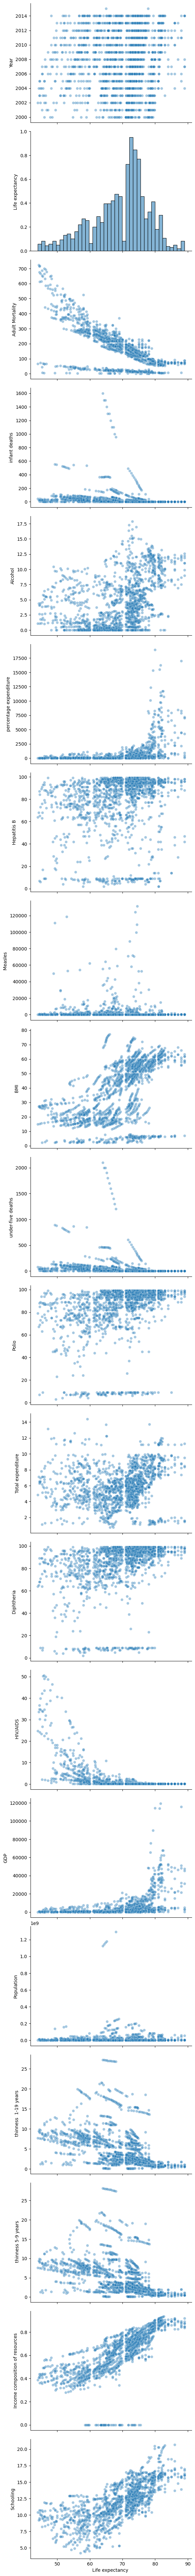

In [73]:
sns.pairplot(data,
             kind='scatter',
             x_vars=['Life expectancy '],
             plot_kws={'alpha':0.4},
             diag_kws={'alpha':0.55, 'bins':40},
             height=4, 
             aspect=1.5)

Com base nos gráficos apresentados acima, podemos reparar que as variáveis que afetam diretamente a expectativa de vida é:

- Income composition of resources: Composição de renda dos recursos
- Schooling: Escolaridade

Podemos ver claramente essa relação nos gráficos plotados abaixo:

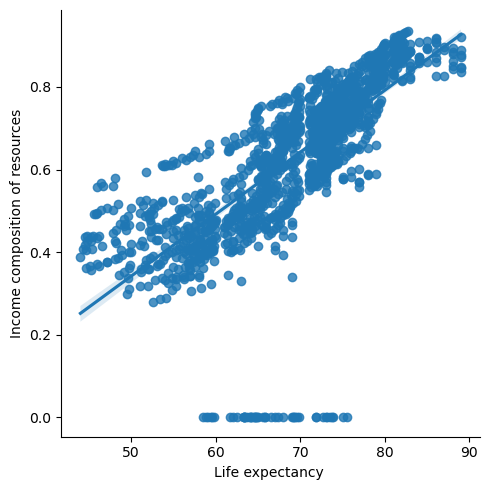

In [74]:
sns.lmplot(x='Life expectancy ', y='Income composition of resources', data=data)

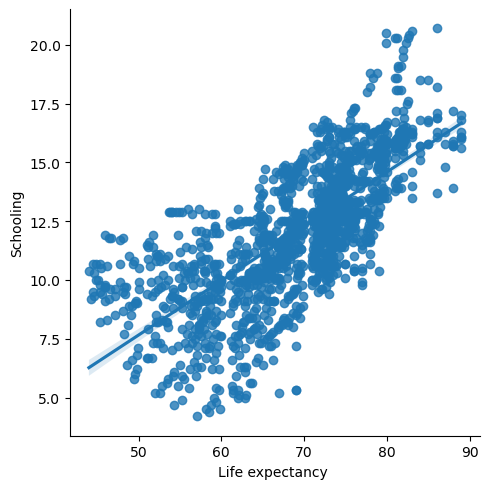

In [75]:
sns.lmplot(x='Life expectancy ', y='Schooling', data=data)

#### 3. Um país com um valor de expectativa de vida menor (menor que 65 anos) deve aumentar seus gastos com saúde para melhorar sua expectativa de vida média?

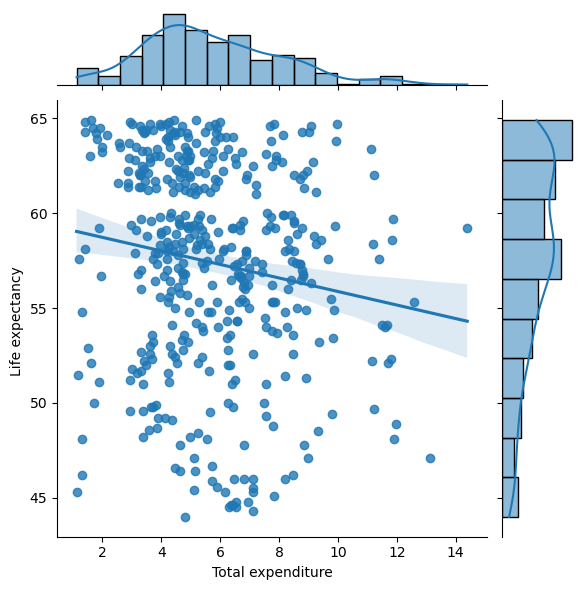

In [76]:
sns.jointplot(x='Total expenditure', y='Life expectancy ', data=data[data['Life expectancy ']<65], kind='reg')

#### 4. Como as taxas de mortalidade infantil e adulta afetam a expectativa de vida?

Text(0.5, 0, 'Life Expectancy')

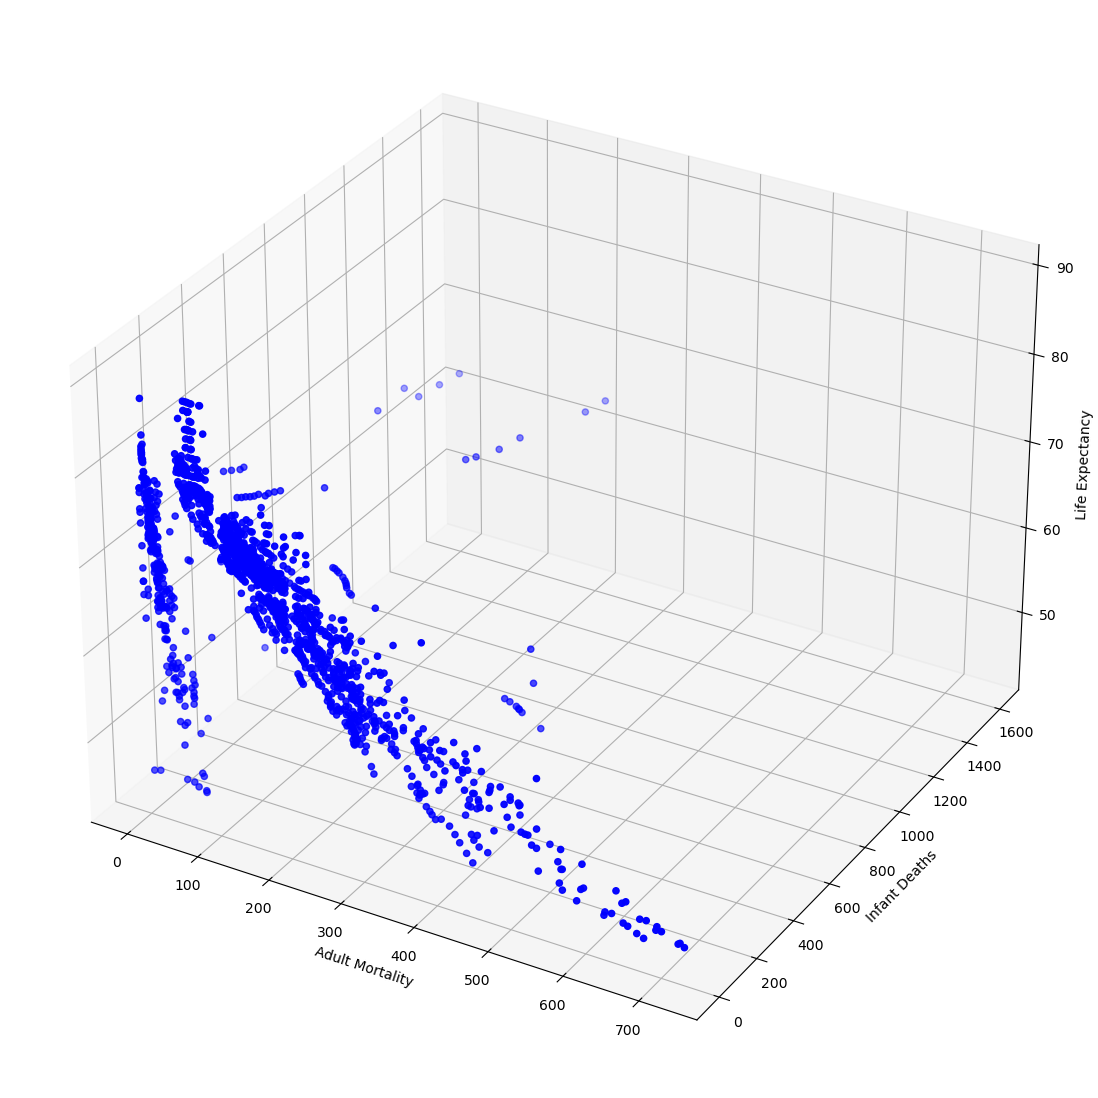

In [113]:
# Criar a figura e o eixo 3D
fig = plt.figure(figsize=(30, 14))
ax = fig.add_subplot(111, projection='3d')

# Definir as variáveis
x = data['Adult Mortality']
y = data['infant deaths']
z = data['Life expectancy ']

# Plotar os dados
ax.scatter(x, y, z, c='b', marker='o')

# Definir os rótulos dos eixos
ax.set_xlabel('Adult Mortality')
ax.set_ylabel('Infant Deaths')
ax.set_zlabel('Life Expectancy')


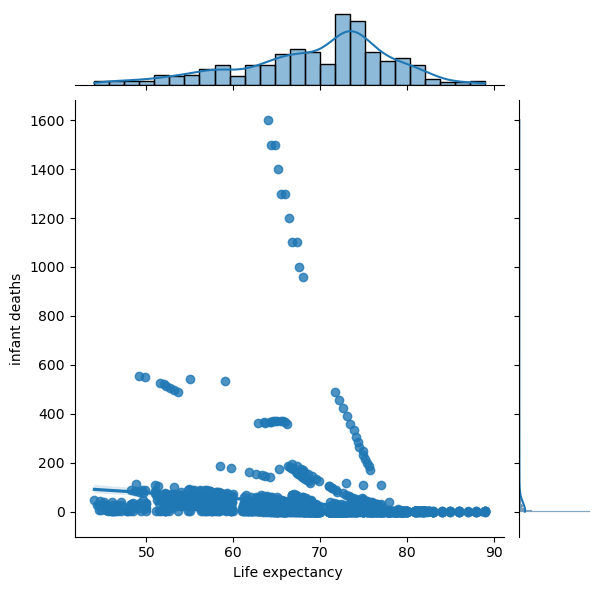

In [78]:
sns.jointplot(x='Life expectancy ', y='infant deaths', data=data, kind='reg')

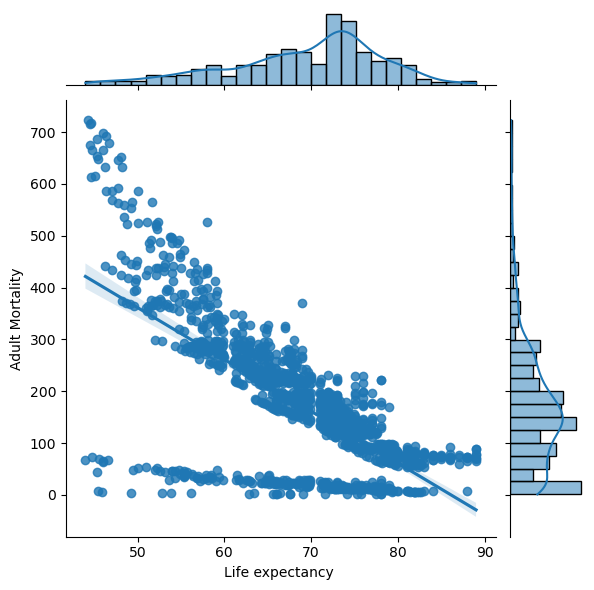

In [79]:
sns.jointplot(x='Life expectancy ', y='Adult Mortality', data=data, kind='reg')

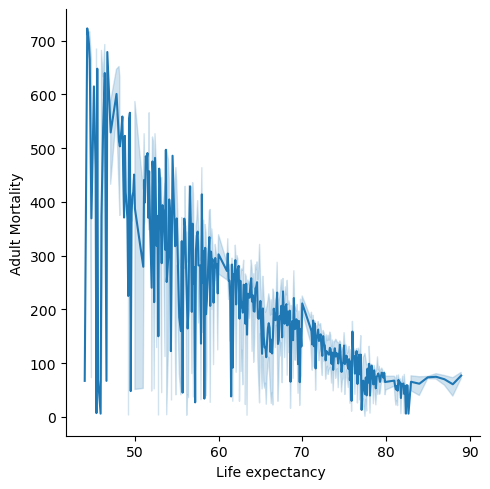

In [80]:
sns.relplot(x='Life expectancy ', y='Adult Mortality', data=data, kind='line')

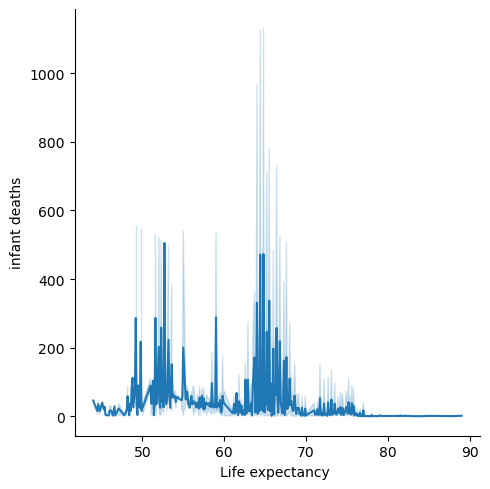

In [81]:
sns.relplot(x='Life expectancy ', y='infant deaths', data=data, kind='line')

#### 7. A expectativa de vida tem relação positiva ou negativa com o consumo de álcool?

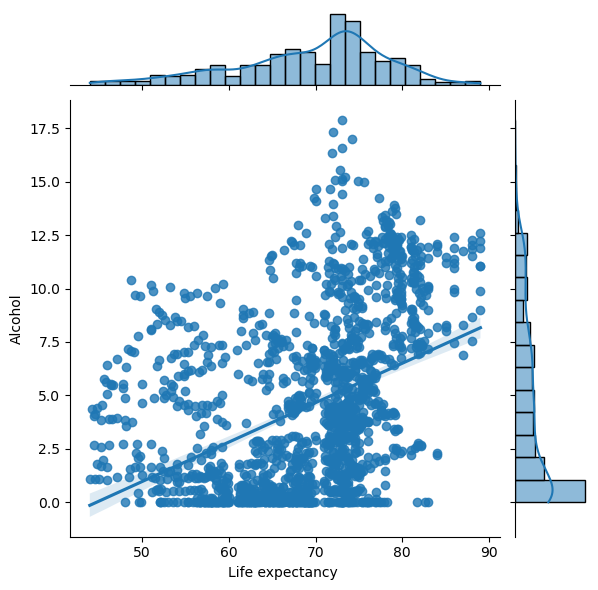

In [82]:
sns.jointplot(x='Life expectancy ', y='Alcohol', data=data, kind='reg')

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Supondo que `data` seja o DataFrame que você está usando
X = data.drop(columns=['Life expectancy ', 'Country'])
y = data['Life expectancy ']

# Aplicando OneHotEncoder de maneira simplificada com pd.get_dummies
X = pd.get_dummies(X, columns=['Status'], drop_first=True)

# Dividindo o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


Mean Squared Error (MSE): 13.014944111971255
Mean Absolute Error (MAE): 2.750004044204399
